In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np

from tqdm import tqdm

import pytorch_lightning as pl

In [2]:
print(torch.__version__)
print(torch.cuda.is_available())

1.7.1
False


In [86]:
class VAEResBlock(torch.nn.Module):
    def __init__(self, in_channels, kernel_size=5) -> None:
        super().__init__()

        self.activation = F.relu

        self.bn1 = torch.nn.BatchNorm2d(in_channels)

        self.bn2 = torch.nn.BatchNorm2d(in_channels * 2)

        self.conv1 = torch.nn.Conv2d(
            in_channels,
            in_channels * 2,
            kernel_size=5,
            stride=2,
            padding=2
        )


        self.conv2 = torch.nn.Conv2d(
            in_channels * 2,
            in_channels * 2,
            kernel_size=5,
            stride=1,
            padding=2,
        )

        self.conv_skip = torch.nn.Conv2d(
            in_channels,
            in_channels * 2,
            kernel_size=5,
            stride=2,
            padding=2

        )

    def forward(self, x):
        print("input: ", x.shape)
        out = self.conv1(self.activation(self.bn1(x)))
        print("conv1: ", out.shape)
        out = self.conv2(self.activation(self.bn2(out)))
        print("conv2: ", out.shape)
        out += self.conv_skip(x)
        print("+skip: ", out.shape)
        #out = self.pool(out)
        #print(out.shape)
        return out

In [136]:
class Reverse_VAEResBlock(torch.nn.Module):
    def __init__(self, in_channels, kernel_size=5) -> None:
        super().__init__()

        self.activation = F.relu

        self.bn1 = torch.nn.BatchNorm2d(in_channels)

        self.bn2 = torch.nn.BatchNorm2d(in_channels // 2)

        self.deconv1 = torch.nn.ConvTranspose2d(
            in_channels,
            in_channels // 2,
            kernel_size=5,
            stride=2,
            padding=2,
            output_padding = 1
        )


        self.deconv2 = torch.nn.ConvTranspose2d(
            in_channels // 2,
            in_channels // 2,
            kernel_size=5,
            stride=1,
            padding=2,
        )

        self.deconv_skip = torch.nn.ConvTranspose2d(
            in_channels,
            in_channels // 2,
            kernel_size=5,
            stride=2,
            padding=2,
            output_padding = 1
        )

    def forward(self, x):
        print("recode: ", x.shape)
        out = self.deconv1(self.activation(self.bn1(x)))
        print("deconv1: ", out.shape)
        out = self.deconv2(self.activation(self.bn2(out)))
        print("deconv2: ", out.shape)
        out += self.deconv_skip(x)
        print("+skip: ", out.shape)
        #out = self.pool(out)
        #print(out.shape)
        return out

In [93]:
boop = nn.ConvTranspose2d(16, 8, kernel_size= 5, stride = 2, padding=2)

torch.Size([16, 8, 8])

In [141]:
img_shape = (4, 32, 32)

tst_img = torch.randn(1, *img_shape)

print("Flat size: ", torch.numel(tst_img))

tst_res = VAEResBlock(img_shape[0])

new = tst_res(tst_img)

tst_res2 = Reverse_VAEResBlock(new.shape[1])

#tst_res2 = nn.ConvTranspose2d(8, 4, kernel_size=5, stride = 2, padding = 2, output_padding = 1)

#tst_res2 = nn.ConvTranspose2d(8, 4, kernel_size=3, stride = 2)

#tst_res2 = VAEResBlock(new.shape[1])

print("---\nPassing to decoder\n---")

new = tst_res2(new)
#print("deconv: ", new.shape)

#tst_res3 = nn.ConvTranspose2d(4, 4, kernel_size=5, stride = 1, padding = 2)

#new = tst_res3(new)
#print("deconv2: ", new.shape)

print("Flat size: ", torch.numel(new))
print("---")
print("Down by factor of: ", torch.numel(tst_img)/torch.numel(new))



Flat size:  4096
input:  torch.Size([1, 4, 32, 32])
conv1:  torch.Size([1, 8, 16, 16])
conv2:  torch.Size([1, 8, 16, 16])
+skip:  torch.Size([1, 8, 16, 16])
---
Passing to decoder
---
recode:  torch.Size([1, 8, 16, 16])
deconv1:  torch.Size([1, 4, 32, 32])
deconv2:  torch.Size([1, 4, 32, 32])
+skip:  torch.Size([1, 4, 32, 32])
Flat size:  4096
---
Down by factor of:  1.0


In [45]:
np.log2(4096/128)

5.0

In [47]:
(256*256)/(2**5)

2048.0

In [46]:
1*256*256


65536

16

In [153]:
x = np.arange(1,10)
y = (x - 1) // 2

print(x)
print(y)

[1 2 3 4 5 6 7 8 9]
[0 0 1 1 2 2 3 3 4]


In [156]:

(lambda x : (x % 2))(x)

array([1, 0, 1, 0, 1, 0, 1, 0, 1])

In [162]:
x = 4
x/=2
x

2.0

In [3]:
from Lit_Ab_VAE import Ab_VAE

In [4]:
img_shape = (3,32,32)
model = Ab_VAE(img_shape)

TypeError: __init__() missing 2 required positional arguments: 'img_channels' and 'res_channels'

Ab_VAE(
  (encoder): Ab_Encoder(
    (bn1): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv1): Conv2d(3, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (layer): Sequential(
      (0): F_ResBlock(
        (bn1): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (bn2): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv1): Conv2d(4, 8, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2), bias=False)
        (conv2): Conv2d(8, 8, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False)
        (conv_skip): Conv2d(4, 8, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
      )
      (1): F_ResBlock(
        (bn1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv1): Conv2d(8, 16, kernel_size=(5, 5), stride=(2,

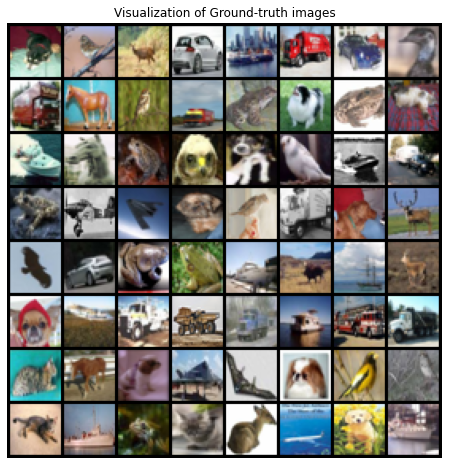

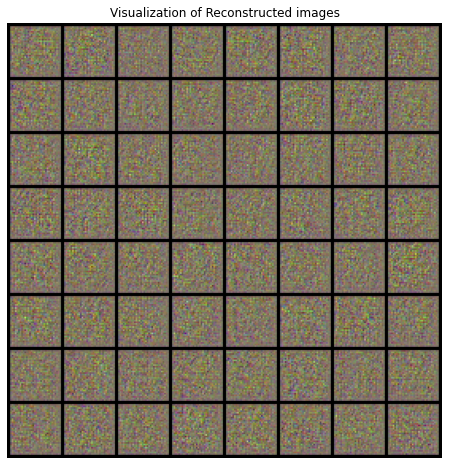

In [17]:
from Lit_Ab_VAE import Ab_VAE

batch_size=128
dataset_path = './img_datasets'
output_path = './img_output'
#checkpoint_file = './img_output/tensorboard/default/version_0/checkpoints/tst.ckpt'
checkpoint_file = './img_output/tensorboard/default/version_0/checkpoints/epoch=18-step=7428.ckpt'


model = Ab_VAE((3,32,32))
model.load_from_checkpoint(checkpoint_path=checkpoint_file)
print(model)

import torch
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader, dataset, random_split
from torchvision.utils import save_image, make_grid
from torchvision.datasets import CIFAR10
import torchvision.transforms as transforms

mnist_transform = transforms.Compose([transforms.ToTensor(),])

kwargs = {'num_workers': 1, 'pin_memory': True} 

train_dataset = CIFAR10(dataset_path, transform=mnist_transform, train=True, download=True)
test_dataset  = CIFAR10(dataset_path, transform=mnist_transform, train=False, download=True)

train_loader = DataLoader(dataset=train_dataset, batch_size=128, shuffle=True, **kwargs)
test_loader  = DataLoader(dataset=test_dataset,  batch_size=128, shuffle=False,  **kwargs)

def draw_sample_image(x, postfix):
  
    plt.figure(figsize=(8,8))
    plt.axis("off")
    plt.title("Visualization of {}".format(postfix))
    plt.imshow(np.transpose(make_grid(x, padding=2, normalize=True), (1, 2, 0)))

model.eval()

with torch.no_grad():

    for batch_idx, (x, _) in enumerate(test_loader):

        #x = x.to(DEVICE)
        x_hat = model(x)
        print(x.shape)
        print(x_hat.shape)
 
        #print("perplexity: ", perplexity.item(),"commit_loss: ", commitment_loss.item(), "  codebook loss: ", codebook_loss.item())
        if batch_idx == 1:
            break

draw_sample_image(x[:batch_size//2], "Ground-truth images")
draw_sample_image(x_hat[:batch_size//2], "Reconstructed images")